<a href="https://colab.research.google.com/github/Fernandaqsouza/MBA_PythonParaBusiness/blob/main/ProjetoMBA_Covid19_Recife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Projeto MBA: Casos graves de COVID 19 de Recife**

**Fonte da base de dados:** *http://dados.recife.pe.gov.br/dataset/casos-graves-covid-19*

**Membros:** Fernanda Souza e Janaina Marques

Projeto com o objetivo de analisar os dados de casos graves de COVID 19 na cidade do Recife desde o inicio da pandemia até o momento, visando praticar a teoria aprendida na disciplina *Phyton para Business Intelligence* do curso *MBA em BI & Analytics*.

##Perguntas que gostariamos de responder:
1. Qual o percentual de casos graves que foram óbitos desde o ínicio da pandemia?
2. Há alguma relação dos casos que foram a óbito com o genero dos pacientes?
3. Qual a quantidade de óbitos por mês?
4. Visto que o número de óbitos em 2021 foi menor do que 2020, tem-se a mesma tendencia em todos os bairros do Recife?
5. Qual o percentual de pacientes de casos graves que são profissionais da saude?
6. Ter alguma doença preexistente influencia na evolução para óbito?

In [ ]:
# Importação da biblioteca Pandas, funções regulares e matplotlib-pyplot

import pandas as pd
import re
import matplotlib.pyplot as plt

In [ ]:
#Acesso ao drive onde está localizado o DataFrame que iremos analisar

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Leitura do banco de dados a ser analisado e atribuição à variável "df" 

arquivo_csv = "/content/drive/My Drive/arq_covid/93f4e8c2-430f-4142-86b3-96dab4905b4e (1).csv"
df = pd.read_csv(arquivo_csv, sep=',')

In [ ]:
#Leitura das primeiras linhas do data frame a ser analisado

df.head()

,_id,data_notificacao,sexo,idade,data_inicio_sintomas,raca,etnia,sintomas_apresentados,outros_sintomas,doencas_preexistentes,outras_doencas_preexistentes,evolucao,classificacao_final,data_obito,profissional_saude,categoria_profissional,municipio_notificacao,bairro,ds
0,1,2021-03-02T00:00:00,Masculino,9 meses,2021-02-24T00:00:00,Ignorado,NaN,"Febre, Tosse, Dispneia, Coriza / Congestão Nasal",NaN,Doenças Respiratórias Crônicas,NaN,INTERNADO LEITO DE ISOLAMENTO,DESCARTADO,NaN,NÃO,NaN,Recife,PASSARINHO,VII
1,2,2021-03-03T00:00:00,Feminino,46,2021-02-28T00:00:00,Branca,NaN,"Dispneia, Dor de Garganta, Cansaço/fadiga, Cef...",NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,EM ANÁLISE,NaN,NÃO,NaN,Recife,BOA VIAGEM,VI
2,3,2021-01-08T00:00:00,Masculino,78,2021-01-06T00:00:00,Branca,NaN,"Tosse, Dispneia, Dor de Garganta, Cansaço/fadi...",NaN,"Doenças Cardíacas ou Vasculares, Doença Hepáti...",NaN,ÓBITO,CONFIRMADO,2021-01-26T00:00:00,NÃO,NaN,Recife,BOA VIAGEM,VI
3,4,2021-03-02T00:00:00,Feminino,62,2021-02-23T00:00:00,Parda,NaN,"Febre, Tosse, Dor de Garganta, Cansaço/fadiga,...",NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,EM ANÁLISE,NaN,NÃO,NaN,Recife,DOIS UNIDOS,II
4,5,2021-03-01T00:00:00,Masculino,26,2021-02-24T00:00:00,Parda,NaN,"Tosse, Dor de Garganta, Desconforto respiratór...",NaN,NaN,NaN,INTERNADO LEITO DE ISOLAMENTO,DESCARTADO,NaN,NÃO,NaN,Recife,NOVA DESCOBERTA,VII


In [ ]:
#Análise dos tipos e colunas que estão no data frame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30416 entries, 0 to 30415
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   _id                           30416 non-null  int64 
 1   data_notificacao              30416 non-null  object
 2   sexo                          30416 non-null  object
 3   idade                         30416 non-null  object
 4   data_inicio_sintomas          29384 non-null  object
 5   raca                          24084 non-null  object
 6   etnia                         3 non-null      object
 7   sintomas_apresentados         28492 non-null  object
 8   outros_sintomas               4939 non-null   object
 9   doencas_preexistentes         10568 non-null  object
 10  outras_doencas_preexistentes  5965 non-null   object
 11  evolucao                      29585 non-null  object
 12  classificacao_final           30416 non-null  object
 13  data_obito      

Percebemos que todas as colunas da base de dados está como o tipo "objeto", ou seja, está como string. Precisamos tratar e transformar de acordo com os dados de cada coluna.

In [ ]:
# Quantidade de linhas e colunas do data frame

df.shape

(30416, 19)

A base de dados utilizada possui 30416 linhas e 19 colunas

In [ ]:
#Cálculo da quantidade de dados nulos por coluna em percentual

((df.isnull().sum()[df.isnull().sum() != 0] / df.shape[0])*100).sort_values(ascending = False).round(2)

etnia                           99.99
categoria_profissional          90.50
outros_sintomas                 83.76
outras_doencas_preexistentes    80.39
data_obito                      74.89
doencas_preexistentes           65.26
municipio_notificacao           39.06
profissional_saude              29.92
raca                            20.82
sintomas_apresentados            6.33
data_inicio_sintomas             3.39
evolucao                         2.73
dtype: float64

Podemos desconsiderar as colunas com valores acima de 80% de dados faltantes:
outras_doencas_preexistentes, outros_sintomas, categoria_profissional, etnia

In [ ]:
#Exclusão das colunas com percentual de dados nulos acima de 80%

df.drop('etnia',axis=1,inplace=True)
df.drop('categoria_profissional',axis=1,inplace=True)
df.drop('outros_sintomas',axis=1,inplace=True)
df.drop('outras_doencas_preexistentes',axis=1,inplace=True)

#Exclusão de colunas irrelevantes

df.drop('ds',axis=1,inplace=True)
df.drop('_id',axis=1,inplace=True)

df.head()

,data_notificacao,sexo,idade,data_inicio_sintomas,raca,sintomas_apresentados,doencas_preexistentes,evolucao,classificacao_final,data_obito,profissional_saude,municipio_notificacao,bairro
0,2021-03-02T00:00:00,Masculino,9 meses,2021-02-24T00:00:00,Ignorado,"Febre, Tosse, Dispneia, Coriza / Congestão Nasal",Doenças Respiratórias Crônicas,INTERNADO LEITO DE ISOLAMENTO,DESCARTADO,NaN,NÃO,Recife,PASSARINHO
1,2021-03-03T00:00:00,Feminino,46,2021-02-28T00:00:00,Branca,"Dispneia, Dor de Garganta, Cansaço/fadiga, Cef...",NaN,INTERNADO LEITO DE ISOLAMENTO,EM ANÁLISE,NaN,NÃO,Recife,BOA VIAGEM
2,2021-01-08T00:00:00,Masculino,78,2021-01-06T00:00:00,Branca,"Tosse, Dispneia, Dor de Garganta, Cansaço/fadi...","Doenças Cardíacas ou Vasculares, Doença Hepáti...",ÓBITO,CONFIRMADO,2021-01-26T00:00:00,NÃO,Recife,BOA VIAGEM
3,2021-03-02T00:00:00,Feminino,62,2021-02-23T00:00:00,Parda,"Febre, Tosse, Dor de Garganta, Cansaço/fadiga,...",NaN,INTERNADO LEITO DE ISOLAMENTO,EM ANÁLISE,NaN,NÃO,Recife,DOIS UNIDOS
4,2021-03-01T00:00:00,Masculino,26,2021-02-24T00:00:00,Parda,"Tosse, Dor de Garganta, Desconforto respiratór...",NaN,INTERNADO LEITO DE ISOLAMENTO,DESCARTADO,NaN,NÃO,Recife,NOVA DESCOBERTA


In [ ]:
# Transformação das colunas em data

df.data_notificacao = pd.to_datetime(df.data_notificacao)
df.data_inicio_sintomas = pd.to_datetime(df.data_inicio_sintomas)
df.data_obito = pd.to_datetime(df.data_obito)

In [ ]:
#Colunas de mes e ano referente as datas preenchidas na base de dados

df['mes_obito'] = df['data_obito'].dt.month
df['ano_obito'] = df['data_obito'].dt.year
df['mes_notificacao'] = df['data_notificacao'].dt.month
df['ano_notificacao'] = df['data_notificacao'].dt.year
df['mes_inicio_sintomas'] = df['data_inicio_sintomas'].dt.month
df['ano_inicio_sintomas'] = df['data_inicio_sintomas'].dt.year

In [ ]:
#Verificação do conteudo da coluna "idade"

df['idade'].unique()

array(['9 meses', '46', '78', '62', '26', '39', '1', '34', '61', '59',
       '2', '48', '69', '93', '57', '80', '54', '56', '75', '30', '67',
       '58', '83', '79', '94', '53', '87', '71', '6 meses', '31', '73',
       '24', '45', '81', '86', '43', '92', '36', '44', '84', '42', '70',
       '72', '23', '35', '64', '60', '88', '37', '52', '65', '47', '49',
       '77', '1 mês', '3 meses', '29', '55', '32', '82', '90', '27',
       '5 meses', '66', '74', '38', '76', '68', '89', '0', '18', '5',
       '85', '33', '12', '40', '41', '51', '50', '63', '101', '28', '3',
       '8', '4 meses', '8 meses', '22', '25', '7', '6', '17', '95', '91',
       '96', '20', '99', '4', '13', '16', '10', '21', '19', '9',
       '10 meses', '2 meses', 'IGN', '103', '11 meses', '15', '100', '98',
       '14', '97', '11', '106', '105', '104', '7 meses', '107', '114',
       '102', '109', '0 meses'], dtype=object)

In [ ]:
# Para não ter string e numero na mesma coluna, foi necessário considerar idades menores que 1 ano = 1 ano

df.idade = df.idade.str.replace('0 meses','1')
df.idade = df.idade.str.replace('1 mês','1')
df.idade = df.idade.str.replace('2 meses','1')
df.idade = df.idade.str.replace('3 meses','1')
df.idade = df.idade.str.replace('4 meses','1')
df.idade = df.idade.str.replace('5 meses','1')
df.idade = df.idade.str.replace('6 meses','1')
df.idade = df.idade.str.replace('7 meses','1')
df.idade = df.idade.str.replace('8 meses','1')
df.idade = df.idade.str.replace('9 meses','1')
df.idade = df.idade.str.replace('10 meses','1')
df.idade = df.idade.str.replace('11 meses','1')
df.idade = df.idade.str.replace('IGN','0')

In [ ]:
# Transformando a coluna idade em numero inteiro

df.idade = pd.to_numeric (df.idade)

In [ ]:
#Verificação das transformações das colunas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30416 entries, 0 to 30415
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   data_notificacao       30416 non-null  datetime64[ns]
 1   sexo                   30416 non-null  object        
 2   idade                  30416 non-null  int64         
 3   data_inicio_sintomas   29384 non-null  datetime64[ns]
 4   raca                   24084 non-null  object        
 5   sintomas_apresentados  28492 non-null  object        
 6   doencas_preexistentes  10568 non-null  object        
 7   evolucao               29585 non-null  object        
 8   classificacao_final    30416 non-null  object        
 9   data_obito             7638 non-null   datetime64[ns]
 10  profissional_saude     21316 non-null  object        
 11  municipio_notificacao  18537 non-null  object        
 12  bairro                 30416 non-null  object        
 13  m

Verificamos que as colunas de datas estão com o formato de "datatime" e os de meses e anos estão como números.

In [ ]:
#Calculo dos percentuais de casos por genero e por raça

print('SEXO:')
print((df['sexo'].value_counts(normalize=True)*100).round(2))
print('====================')
print('RAÇA:')
print((df['raca'].value_counts(normalize=True)*100).round(2))

SEXO:
Feminino     50.60
Masculino    49.40
Ignorado      0.01
Name: sexo, dtype: float64
RAÇA:
Parda       50.44
Ignorado    25.69
Branca      19.42
Preta        3.75
Amarela      0.64
Indígena     0.07
Name: raca, dtype: float64


Na distribuição de casos por genero não percebemos muita diferença, pois os percentuais de feminino e masculino estão bem próximos. No entanto, quando analisamos a distribuição por raça, percebemos que a metade dos casos estão concentrados na raça parda e a outra metade distribuida entre pessoas que não responderam sobre a raça e pessoas brancas. As raças preta, amarela e indigena possuem percentuais mais baixos.

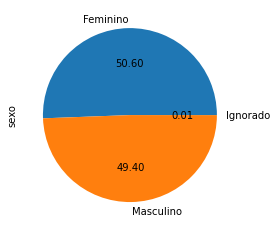

In [ ]:
#Representação gráfica da distribuição dos casos por genero

(df['sexo'].value_counts(normalize=True)*100).plot.pie(autopct='%.2f')

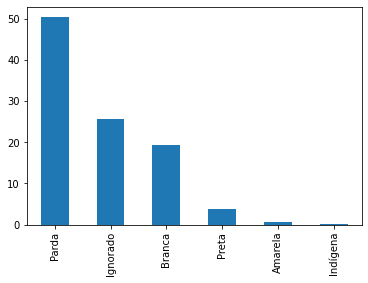

In [ ]:
#Representação gráfica da distribuição dos casos por raça

(df['raca'].value_counts(normalize=True)*100).plot.bar()

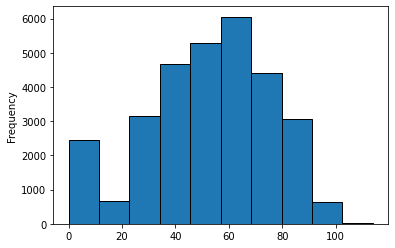

In [ ]:
#Representação gráfica da distribuição de casos por idade dos pacientes

df['idade'].plot(kind = 'hist', edgecolor = 'black')

Podemos perceber que a concentração maior de casos de COVID 19 foi em pacientes entre 50 e 70 anos.

In [ ]:
#Exportando base transformada

df.to_csv('base_covid_transformada.csv', index=False)

QUESTÃO 1

Qual o percentual de casos graves que foram óbitos desde o ínicio da pandemia?

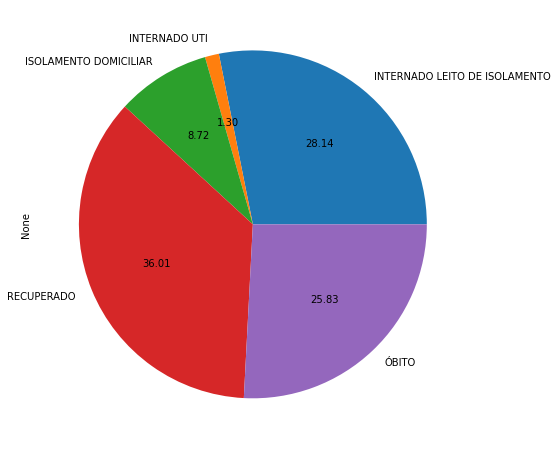

In [ ]:
#Geração de gráfico em pizza para ilustrar os percentuais relativos à classificação de acordo com a evolução dos casos

df.groupby('evolucao').size().plot(kind='pie',  figsize=(8, 8), autopct='%.2f')

Podemos verificar que de todos os casos graves registrados tivemos 36% de pacientes recuperados e 25,8% de pacientes que foram a óbito. 

QUESTÃO 2

Há alguma relação dos casos que foram a óbito com o genero dos pacientes?

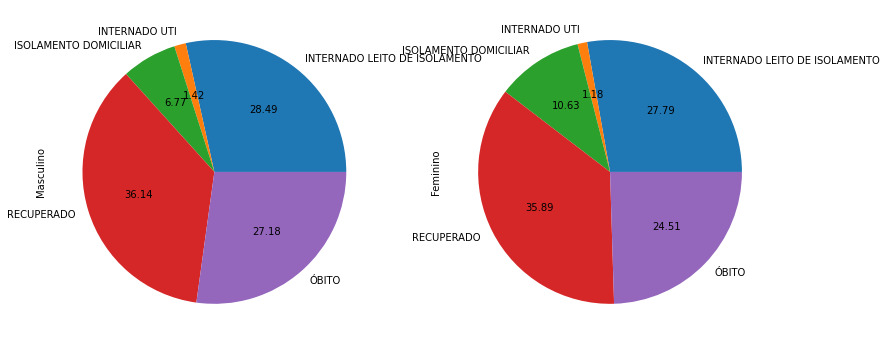

In [ ]:
#Geração de gráficos com a classificação da evolução analisados separadamente para os generos masculino e feminino

#Mantendo apenas as linhas cujos valores para a coluna sexo sejam "Masculino" ou "Feminino" (Removendo valores "Ignorado")
df_s = df.loc[df['sexo'].isin(['Masculino', 'Feminino'])]

f, a = plt.subplots(1,2)
for sx, ax in zip(set(df_s.sexo), a.ravel()):
  df_s[df_s.sexo.eq(sx)].groupby('evolucao').size().plot.pie( y='sexo', ax=ax, label=sx, figsize=(13, 8), autopct='%.2f')

plt.show()

Analisando os percentuais apresentados nos graficos, podemos perceber que o maior percentual nos dois generos (Masculino e Feminino) é o de recuperados, em torno de 36%. Quando analisamos os percentuais de óbito, percebemos que o masculino tem percentual maior, em torno e 27%, contra um percentual de 24,5% do genero feminino. 

QUESTÃO 3

Qual a quantidade de óbitos por mês?

In [ ]:
#Geração dos valores de quantidade de óbito por mês
df_obito = df.loc[df['evolucao'].isin(['ÓBITO'])]

#Como esta extração não possui todos os dados do mês de setembro/2021, serão utilizados os dados até o mês de agosto/2021
df_obito = df_obito[df_obito['data_obito'] < '2021-09-01']

df_obito['data_obito'].groupby(df.data_obito.dt.to_period("M")).agg('count')

data_obito
2020-03      31
2020-04     668
2020-05    1473
2020-06     583
2020-07     363
2020-08     255
2020-09     191
2020-10     163
2020-11     264
2020-12     372
2021-01     364
2021-02     266
2021-03     614
2021-04     654
2021-05     579
2021-06     424
2021-07     233
2021-08     116
Freq: M, Name: data_obito, dtype: int64

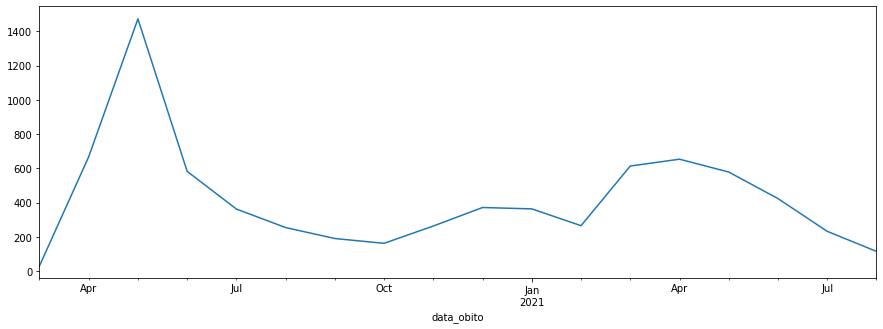

In [ ]:
#Geração de um gráfico de linha para analisar as tendencias da quantidade de óbito através dos meses

df_obito['data_obito'].groupby(df.data_obito.dt.to_period("M")).agg('count').plot.line(figsize=(15,5))

Podemos perceber que o maior pico de óbitos por COVID 19 foi em maio de 2020, com queda nos meses subsequentes. Tendencia de aumento a partir de fevereiro de 2021, tendo pico em abril e tendencia de queda nos meses subsequesentes.

QUESTÃO 4

Visto que o número de óbitos em 2021 foi menor do que 2020, tem-se a mesma tendencia em todos os bairros do Recife?

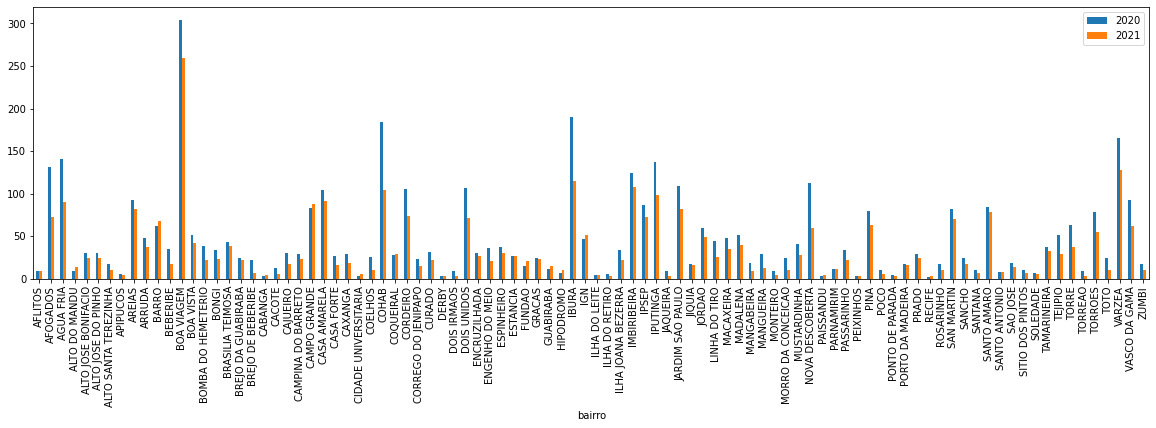

In [ ]:
#Geração de um grafico de barras para comparar os numeros de óbitos por ano para cada bairro do Recife

df_obito_bairro = df.loc[df['evolucao'].isin(['ÓBITO'])]

df_obito_bairro_2020 = df_obito[df_obito['data_obito'] < '2021-01-01']

df_obito_bairro_2021 = df_obito[df_obito['data_obito'] >= '2021-01-01']

pd.concat({
    '2020': df_obito_bairro_2020['evolucao'].groupby(df.bairro).agg('count'), 
    '2021': df_obito_bairro_2021['evolucao'].groupby(df.bairro).agg('count')
    }, axis=1).plot.bar(figsize=(20,5))

Percebe-se uma tendencia de decrescimento na maioria dos bairros de 2020 para 2021, como Afogados, Cohab, Nova Descoberta, etc. Entretanto há alguns bairros que tiveram um aumento de casos de óbito em 2021 como Alto do Mandu, Barro, Campo Grande, Cidade Universitaria, Coqueiral e Fundao. Para esses bairros que vemos o aumento em 2021 a prefeitura pode utilizar o gráfico para direcionar politicas publicas, campanhas de vacinação, etc. como tratativa para diminuir os casos de óbito.


QUESTÃO 5

Qual o percentual de pacientes de casos graves que são profissionais da saude?

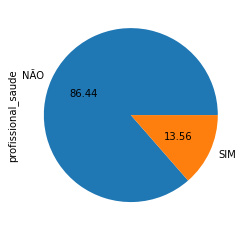

In [ ]:
#Geração de um gráfico de pizza para analisar a quantidade de casos relacionados aos profissionais de saude

percent_ps = df.profissional_saude.value_counts() / df['profissional_saude'].notnull().sum()
percent_ps.plot(kind='pie', autopct='%.2f' )




Apesar dos profissionais de saude terem maior contato com a doença por estarem em hospitais, podemos perceber que a maioria dos casos registrados são de pessoas que não trabalham nessa área, com 86,4%. 

QUESTÃO 6

Ter alguma doença preexistente influencia na evolução para óbito?

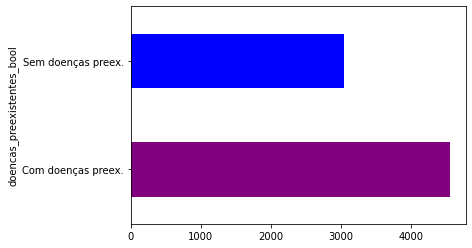

In [ ]:
#Geração de gráfico para comparar número de óbitos em pacientes com e sem doenças preexistentes.

df_obito['doencas_preexistentes_bool'] = df_obito['doencas_preexistentes'].notnull().map({True : 'Com doenças preex.', False : 'Sem doenças preex.'})

df_obito.groupby('doencas_preexistentes_bool').size().plot(kind='barh', color = ['purple','blue'])

Considerando "True" como casos de óbito em pacientes com doenças preexistentes e "False" em pacientes sem doenças preexistentes, concluimos que o maior numero de casos foram com doenças preexistentes, então pode ter alguma influencia na evolução da doença.